# Scrapping Website Marketplace

# Proses Pembuatan Scrapping dengan Target Tokopedia

## Scraping dengan Beautiful Soup 4
### 1.Mempersiapkan Tools

Sebelum Melakukan Scrapping dan ,
Library yang dibutuhkan yaitu:
* Selenium
* Beautiful Soup 4

Library Tersebut Dapat di install dengan python3 yaitu:
* ```pip3 install selenium```
* ```pip3 install beautifulsoup4```

Mempersiapkan Aplikasi Browser dan Driver Browser:
* Aplikasi Browser sudah tersintall
* Driver Browser sudah terinstall
* Aplikasi dan Driver harus memiliki Versi yang sama

Proses Installasi

* Dengan Firefox
    1. Jika Belum memiliki Browser Firefox, dapat di [Download](https://download.mozilla.org/?product=firefox-stub&os=win&lang=en-US&attribution_code=c291cmNlPXd3dy5nb29nbGUuY29tJm1lZGl1bT1yZWZlcnJhbCZjYW1wYWlnbj0obm90IHNldCkmY29udGVudD0obm90IHNldCkmZXhwZXJpbWVudD0obm90IHNldCkmdmFyaWF0aW9uPShub3Qgc2V0KSZ1YT1jaHJvbWU.&attribution_sig=774d9972789664be6672b065e7f33820ea1cb1e7bafb5ea8c6b2a4f4bc207c70) 
    2. Jika sudah, anda dapat memeriksa browser anda, dibawah ini adalah caranya:
        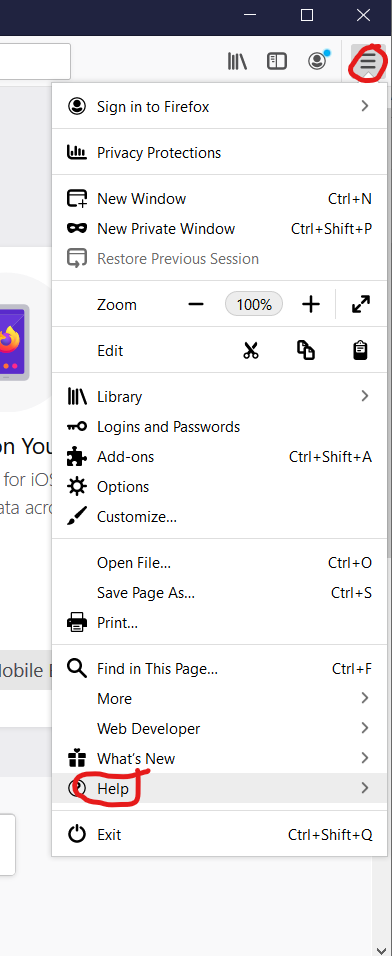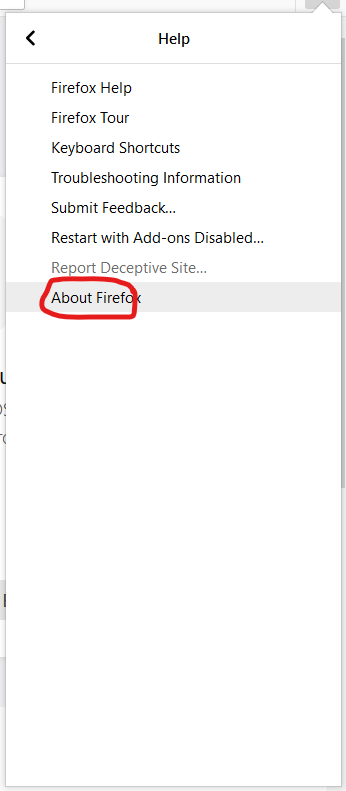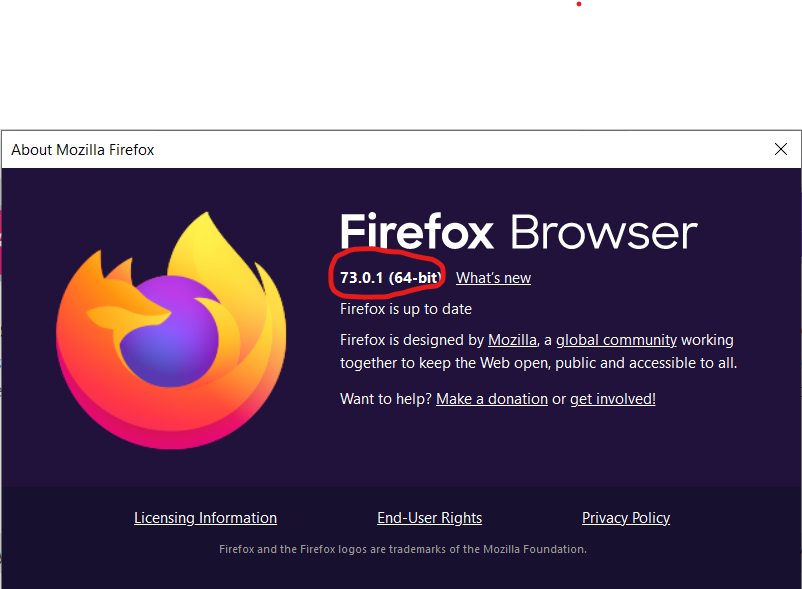
    3. Intal driver browsing sesuai dengan versi aplikasi browsing [Download](https://github.com/mozilla/geckodriver/releases)
    
* Dengan Chrome
    1. Jika Belum memiliki Browser Chrome, dapat di [Download](https://dl.google.com/tag/s/appguid%3D%7B8A69D345-D564-463C-AFF1-A69D9E530F96%7D%26iid%3D%7BD6B35C78-230B-9B28-CF32-7395FA19234C%7D%26lang%3Den%26browser%3D4%26usagestats%3D1%26appname%3DGoogle%2520Chrome%26needsadmin%3Dprefers%26ap%3Dx64-stable-statsdef_1%26installdataindex%3Dempty/update2/installers/experimental/0/ChromeSetup.exe?src=1&filename=ChromeSetup.exe)
    2. Jika sudah, anda dapat memeriksa browser anda, dibawah ini adalah caranya:
       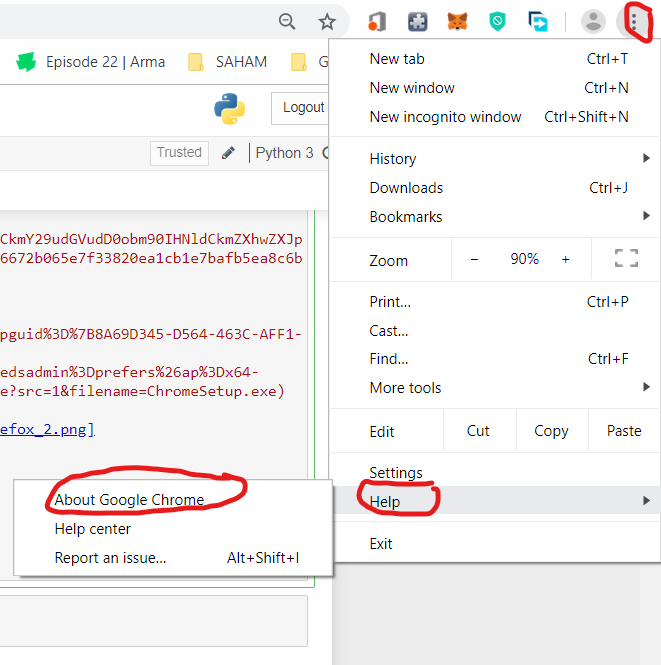 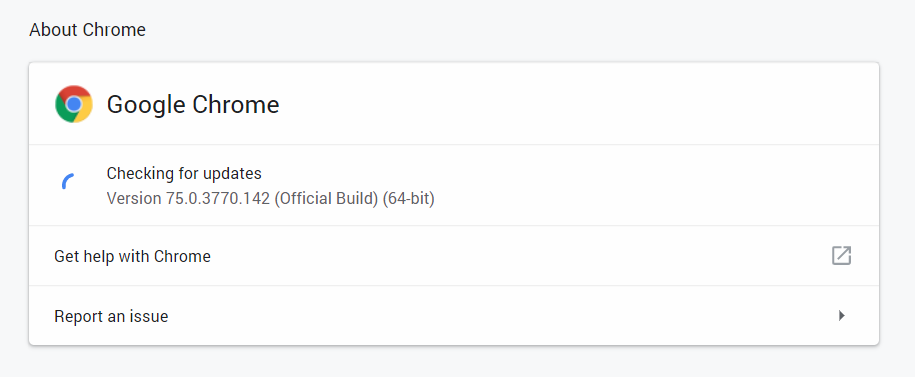
    3. Intal driver browsing sesuai dengan versi aplikasi browsing [Download](https://chromedriver.chromium.org/downloads)


Pada kali ini akan Scraping Website Tokopedia:

### 2.Import Library dan Generate Scrapping
* Mengimport Library <ins>Beautiful Soup 4</ins> dan <ins>Requests</ins>

In [1]:
from bs4 import BeautifulSoup
import requests

* Berikut ini adalah template link request untuk melakukan pencaring, <br>
Kemudian program akan meminta input user untuk barang yang akan dicari

In [3]:
linkURL="https://www.tokopedia.com/search?st=product&q="

linkTool=input("Mencari Barang: ")
linkTool=linkTool.replace(" ", "+")

Mencari Barang: lampu led


* Jika input sudah didapatkan, maka program akan melakukan request

In [4]:
page = requests.get(linkURL+linkTool,timeout=2)

ReadTimeout: HTTPSConnectionPool(host='www.tokopedia.com', port=443): Read timed out. (read timeout=2)

jika requests langsung terhadap link tokopedia, maka akan error seperti ini <br>
dikarenakan tidak menggunakan user agent, yang seolah-olah mengakses web tersebut menggunakan user agent tersebut.

In [5]:
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.50 Safari/537.36'
}
page = requests.get(linkURL+linkTool,headers=headers)

In [6]:
scrapping=BeautifulSoup(page.content,'lxml')
print(scrapping)

<!DOCTYPE html>
<!--[if IE 7 ]><html class="no-js ie7 oldie" dir="ltr" lang="id"><![endif]--><!--[if IE 8 ]><html class="no-js ie8 oldie" dir="ltr" lang="id"><![endif]--><!--[if (gte IE 9)|(gt IEMobile 7)|!(IEMobile)|!(IE)]><!--><html class="no-js" dir="ltr" lang="id"><!--<![endif]--><head> <title data-react-helmet="true">Jual lampu led | Tokopedia</title> <meta content="text/html; charset=utf-8" data-react-helmet="true" http-equiv="Content-Type"/><meta content="width=device-width, initial-scale=1.0" data-react-helmet="true" name="viewport"/><meta content="telephone=no" data-react-helmet="true" name="format-detection"/><meta content="https://ecs7.tokopedia.net/img/attachment/2019/10/14/40768394/40768394_a4b8c9ee-581e-4be6-b320-b467276927ec.jpg" data-react-helmet="true" property="og:image"/><meta content="https://ecs7.tokopedia.net/img/attachment/2019/10/14/40768394/40768394_a4b8c9ee-581e-4be6-b320-b467276927ec.jpg" data-react-helmet="true" property="og:image:secure_url"/><meta content=

* jika menggunakan requests get terhadap target URL, hasil scrpaping data website akan di dapatkan,<br>
__Tetapi__ javascript tidak akan jalan, karena dengan requests tidak menjalankan javascript.

* maka dari itu, harus di import library __selenium__ yang berfungsi untuk menjalankan engine driver browser.<br>
hal ini bermanfaat terhadap website scrapping untuk menjalankan javascript

In [7]:
from selenium import webdriver

* setelah import library, pastikan browser driver dan aplikasi browser sudah terinstall di perangkat. <br>
patikan juga browser driver dan aplikasi browser harus memiliki versi yang sama.

* dalam scrapping kali ini, saya akan menggunakan chrome sebagai tools yang saya gunakan  untuk scrapping

* Jangan lupa untuk menyertakan user agent, dengan membuat variable user agent terlebih dahulu. 

In [8]:
user_agent = 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.50 Safari/537.36'

* Pada option web driver, akan di konfigurasi seperti ini:

In [9]:
options = webdriver.ChromeOptions()
options.add_argument('--incognito')
options.add_argument('user-agent={0}'.format(user_agent))
# options.add_argument('--headless')

> Penjelasan option:
> * --incognito = tidak menyimpan jejak pencarian yang dilakukan.
> * --headless = supaya UI tidak di munculkan yang bermanfaat supaya proses scrapping lebih cepat.
> * --user agent = berguna untuk dapat bernegosiasi dengan server website

* Kemudian masukkan option tersebut ke dalam konfigurasi chrome driver.

In [14]:
driver = webdriver.Chrome(options=options)

* lakukan scrapping dengan generate isi page_source, kemudian generate source code dengan BeautifulSoup.

In [10]:
driver.get(linkURL+linkTool)

In [11]:
content = driver.page_source
scrapping = BeautifulSoup(content,'lxml')
print(scrapping)

* Untuk hasil scrapping, akan memunculkan banyak data.<br>
untuk membatasinya, harus dibutuhkan input integer<br>
supaya banyak data yang di keluarkan sesuai dengan yang dimaksud.

In [12]:
batas=int(input("Batas Kemunculan Barang: "))

Batas Kemunculan Barang: 5


### 3.Proses Data


* Pada Website Topedia, hasil pencarian barang akan langsung di tujukan dengan barang rekomendasi,<br>
selebihnya memunculkan barang dengan filter "paling sesuai"
* di bawah ini adalah function untuk memproses data
* Varibel 'Atas' untuk menampung data penjualan yang kurang
* Varibel 'Semua' untuk menampung data penjualan yang laku

In [13]:
Atas = scrapping.findAll('div', attrs={'class':'ta-product-wrapper'})
Semua = scrapping.findAll('div', attrs={'class':'_2OBup6Zd'})
count_data = 0 #initial count dari 0

In [14]:
# NEW or HOT
for data in Atas:
    if count_data==batas:
        break
    count_data+=1
    link=data.find('a',href=True, attrs={'class':'anchor-overlay'})['href']
    print("Link\t: ",link)
    judul=data.find('span',attrs={'ta-product-title'})
    print("Judul\t: ",judul.text)
    harga=data.find('span',attrs={'ta-product-price'})
    print("Harga\t: ",harga.text)
    rating=data.find('span',attrs={'ta-product-rating-count'})
    print("Rating\t: ","(0)" if rating == None else rating.text)
    print()

Link	:  https://www.tokopedia.com/idyllic/unofficial-photocard-set-twice-blackpink-bts-wanna-one?src=topads
Judul	:  [UNOFFICIAL PHOTOCARD SET] TWICE BLACKPINK BTS WANNA ONE
Harga	:  Rp 5.625
Rating	:  (0)

Link	:  https://www.tokopedia.com/dynastindoasia/topi-kelinci-gerak-bunny-hat-bts-exo-blackpink-twice-putih?src=topads
Judul	:  TOPI KELINCI GERAK / BUNNY HAT - BTS EXO BLACKPINK TWICE - Putih
Harga	:  Rp 19.000
Rating	:  (71)

Link	:  https://www.tokopedia.com/calestyolshop/masker-kain-motif-boyband-girlband-korea-bts-exo-blackpink-twice-polos?src=topads
Judul	:  Masker Kain Motif Boyband/Girlband Korea (BTS, EXO, BLACKPINK, TWICE) - POLOS
Harga	:  Rp 5.000
Rating	:  (19)

Link	:  https://www.tokopedia.com/kebunku-1/tas-sekolah-wanita-blackpink-bts-twice-blackpink?src=topads
Judul	:  Tas Sekolah Wanita BlackPink BTS Twice - BlackPink
Harga	:  Rp 85.000
Rating	:  (5)

Link	:  https://www.tokopedia.com/dynastindoasia/topi-kelinci-biru-gerak-bunny-hat-bts-exo-blackpink-twice?src=topad

In [15]:
count_data = 0 #initial count dari 0
# ALL
for data in Semua:
    if count_data==batas:
        break
    count_data+=1
    link=data.find('a')['href']
    print("Link\t: ",link)
    judul=data.find('h3',attrs={'Ka_fasQS'})
    print("Judul\t: ",judul.text)
    harga=data.find('span',attrs={'_3fNeVBgQ'})
    print("Harga\t: ",harga.text)
    rating=data.find('span',attrs={'_3-hbLA9j'})
    print("Rating\t: ","(0)" if rating == None else rating.text)
    print()

Link	:  https://www.tokopedia.com/dynastindoasia/topi-kelinci-gerak-bunny-hat-bts-exo-blackpink-twice-putih?trkid=f%3DCa0000L000P0W0S0Sh%2CCo0Po0Fr0Cb0_src%3Dsearch_page%3D1_ob%3D23_q%3Dbts+twice_bmexp%3D0_po%3D1_catid%3D1933_bmexp%3D0&whid=0
Judul	:  TOPI KELINCI GERAK / BUNNY HAT - BTS EXO BLACKPINK TWICE
Harga	:  Rp 19.000
Rating	:  (71)

Link	:  https://www.tokopedia.com/toserbalarisshop/bunny-hat-led-topi-kelinci-kpop-korea-exo-twice-blackpink-bts-pikachu?trkid=f%3DCa0000L000P0W0S0Sh%2CCo0Po0Fr0Cb0_src%3Dsearch_page%3D1_ob%3D23_q%3Dbts+twice_bmexp%3D0_po%3D2_catid%3D1933_bmexp%3D0&whid=0
Judul	:  BUNNY HAT LED TOPI KELINCI KPOP KOREA EXO-TWICE-BLACKPINK-BTS -PIKACHU
Harga	:  Rp 39.000
Rating	:  (75)

Link	:  https://www.tokopedia.com/efefshop2/dancing-bunny-hat-topi-kelinci-kpop-korea-exo-twice-blackpink-bts-kelinci-putih?trkid=f%3DCa0000L000P0W0S0Sh%2CCo0Po0Fr0Cb0_src%3Dsearch_page%3D1_ob%3D23_q%3Dbts+twice_bmexp%3D0_po%3D3_catid%3D1933_bmexp%3D0&whid=0
Judul	:  Dancing Bunny Hat

In [ ]:
def scrappingTokopedia();
    linkURLTokopedia="https://www.tokopedia.com/search?st=product&q="
    scrapping=BeautifulSoup(page.content,'lxml')
    Atas = scrapping.findAll('div', attrs={'class':'ta-product-wrapper'})
    Semua = scrapping.findAll('div', attrs={'class':'_2OBup6Zd'})
    count_data = 0 #initial count dari 0
    # NEW or HOT
    for data in Atas:
        if count_data==batas:
            break
        count_data+=1
        link=data.find('a',href=True, attrs={'class':'anchor-overlay'})['href']
        print("Link\t: ",link)
        judul=data.find('span',attrs={'ta-product-title'})
        print("Judul\t: ",judul.text)
        harga=data.find('span',attrs={'ta-product-price'})
        print("Harga\t: ",harga.text)
        rating=data.find('span',attrs={'ta-product-rating-count'})
        print("Rating\t: ","(0)" if rating == None else rating.text)
        print()
    count_data = 0 #initial count dari 0
    # ALL
    for data in Semua:
        if count_data==batas:
            break
        count_data+=1
        link=data.find('a')['href']
        print("Link\t: ",link)
        judul=data.find('h3',attrs={'Ka_fasQS'})
        print("Judul\t: ",judul.text)
        harga=data.find('span',attrs={'_3fNeVBgQ'})
        print("Harga\t: ",harga.text)
        rating=data.find('span',attrs={'_3-hbLA9j'})
        print("Rating\t: ","(0)" if rating == None else rating.text)
        print()

# Scrapping Lazada

In [27]:
driver = webdriver.Chrome(options=options)
linkURLLazada="https://www.lazada.co.id/catalog/?q="
driver.get(linkURLLazada+linkTool)
content = driver.page_source
scrapping = BeautifulSoup(content,'lxml')
# Atas = scrapping.findAll('div', attrs={'class':'ta-product-wrapper'})
# count_data = 0 #initial count dari 0
# # NEW or HOT
# for data in Atas:
#     if count_data==batas:
#         break
#     count_data+=1
#     link=data.find('a',href=True, attrs={'class':'anchor-overlay'})['href']
#     print("Link\t: ",link)
#     judul=data.find('span',attrs={'ta-product-title'})
#     print("Judul\t: ",judul.text)
#     harga=data.find('span',attrs={'ta-product-price'})
#     print("Harga\t: ",harga.text)
#     rating=data.find('span',attrs={'ta-product-rating-count'})
#     print("Rating\t: ","(0)" if rating == None else rating.text)
#     print()
Semua = scrapping.findAll('div', attrs={'class':'c2prKC'})
count_data = 0 #initial count dari 0
# ALL
for data in Semua:
#     if count_data==batas:
#         break
    count_data+=1
    link=data.find('a')['href']
    print("Link\t: https://",link[2:])
    judul=data.find('div',attrs={'c16H9d'})
    print("Judul\t: ",judul.text)
    harga=data.find('span',attrs={'c13VH6'})
    print("Harga\t: ",harga.text)
    rating=data.find('span',attrs={'c3XbGJ'})
    print("Rating\t: ","(0)" if rating == None else rating.text)
    print()

# Scrapping Bukalapak

In [47]:
# driver = webdriver.Chrome(options=options)
linkURLBukalapak="https://www.bukalapak.com/products?utf8=%E2%9C%93&from_keyword_history=false&search%5Bkeywords%5D="
driver.get(linkURLBukalapak+linkTool)
content = driver.page_source
scrapping = BeautifulSoup(content,'lxml')
# Atas = scrapping.findAll('div', attrs={'class':'ta-product-wrapper'})
# count_data = 0 #initial count dari 0
# # NEW or HOT
# for data in Atas:
#     if count_data==batas:
#         break
#     count_data+=1
#     link=data.find('a',href=True, attrs={'class':'anchor-overlay'})['href']
#     print("Link\t: ",link)
#     judul=data.find('span',attrs={'ta-product-title'})
#     print("Judul\t: ",judul.text)
#     harga=data.find('span',attrs={'ta-product-price'})
#     print("Harga\t: ",harga.text)
#     rating=data.find('span',attrs={'ta-product-rating-count'})
#     print("Rating\t: ","(0)" if rating == None else rating.text)
#     print()
Semua = scrapping.findAll('article', attrs={'class':'product-display'})
count_data = 0 #initial count dari 0
# ALL
for data in Semua:
#     if count_data==batas:
#         break
    count_data+=1
    link=data.find('a')['href']
    print("Link\t: ",link)
    judul=data.find('a',attrs={'product__name'})
    print("Judul\t: ",judul.text)
    harga=data.find('span',attrs={'amount'})
    print("Harga\t: ","Rp ",harga.text)
    rating=data.find('a',attrs={'review__aggregate'})
    print("Rating\t: ","(0)" if rating == None else rating.text)
    print()


Link	:  https://www.bukalapak.com/p/sepeda/equipment-tools/lampu-senter/1fgnda5-jual-lampu-sepeda-led-usb?dtm_section=top_promoted&dtm_source=list-product&from=&product_owner=normal_seller
Judul	:  Lampu Sepeda LED USB
Harga	:  Rp  195.000
Rating	:  29 ulasan

Link	:  https://www.bukalapak.com/p/sepeda/equipment-tools/lampu-senter/ouczr6-jual-lampu-sepeda-led-taillight-rechargeable?dtm_section=top_promoted&dtm_source=list-product&from=&product_owner=normal_seller
Judul	:  Lampu Sepeda LED Taillight Rechargeable
Harga	:  Rp  90.000
Rating	:  6 ulasan

Link	:  https://www.bukalapak.com/p/mobil-part-dan-aksesoris/aksesoris-mobil/aksesoris-interior/vexgwu-jual-lampu-mobil-led-c6-h4-cob-2pcs?dtm_section=top_promoted&dtm_source=list-product&from=&product_owner=normal_seller
Judul	:  Lampu Mobil LED C6 H4 COB 2PCS
Harga	:  Rp  190.000
Rating	:  16 ulasan

Link	:  https://www.bukalapak.com/p/elektronik/komponen-elektronik/uni5cc-jual-alat-pegangan-solder-plus-kaca-pembesar-plus-lampu-led?dtm_s

In [18]:
driver.quit()